# Исследование объявлений о продаже квартир

**Цель исследования:** 

1. Установить параметры, влияющие на цену объектов недвижимости;
2. Дать рекомендации для построения автоматизированной системы отслеживания аномалий и мошеннической деятельности;

**Ход исследования:**

Данные для исследования будут извлечены из файла /datasets/real_estate_data.csv. Так как они представлены в необработанном виде, потребуется предварительный обзор данных.

Затем необходимо провести очистку данных от аномалий и дубликатов, заполнить пропуски. После предобработки данных понадобится провести расчеты и добавить новые параметры для анализа. Затем на основе подготовленных данных провести исследовательский анализ.

Таким образом, исследование можно разбить на следующие последовательные этапы:
 1. Обзор данных
 2. Предобработка данных
 3. Проведение расчетов и добавление новых параметров в таблицу
 4. Исследовательский анализ, часть 1: исследование параметров, влияющих на цену объекта
 5. Исследовательский анализ, часть 2: исследование объектов недвижимости в Ленинградской области
 6. Исследовательный анализ, часть 3: исследование для объектов недвижимости в Санкт-Петербурге
 7. Формирование заключительного вывода и рекомендаций для автоматизированной системы распознавания аномалий и мошеннической деятельности

### Обзор данных

1.1 Загрузим необходимые для работы библиотеки:

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

1.2 Откроем файл с данными и запишем его в переменную data:

In [2]:
data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')

1.3 Изучим первые строки датафрейма:

In [3]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В каждой строке датафрейма имеются данные о следующих параметрах:
    
    1) Количество фотографий в объявлении;
    2) Цене недвижимости на момент снятия объявления с публикации;
    3) Общая площадь недвижимости (в квадратных метрах);
    4) Дата и время публикации объявления;
    5) Количество комнат;
    6) Высота потолка (в метрах);
    7) Количество этажей в здании;
    8) Площадь жилой зоны (в квадратных метрах);
    9) Этаж;
    10) Информация о том, является ли недвижимость апартаментами или нет;
    11) Информация о том, имеет ли недвижимость свободную планировку;
    12) Информацию о том, является ли квартирой-студией данная недвижимость;
    13) Площадь кухни (в квадратных метрах);
    14) Количество балконов;
    15) Название населенного пункта;
    16) Расстояние до ближайшего аэропорта (в метрах);
    17) Расстояние до центра города (в метрах);
    18) Количество парков в радиусе 3 км;
    19) Расстояние до ближайшего парка (в метрах);
    20) Количество водоемов в радиусе 3 км;
    21) Расстояние до ближайшего водоема (в метрах);
    22) Сколько дней было размещено объявление;
    

1.4 Изучим общую информацию о датафрейме:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно выводу метода info(), в датафрейме 23699 записей о недвижимости. Всего в данных присутствуют 22 параметра, из них в 14 присутствуют пропущенные значения.

1.5 Построим гистограммы для каждого численного параметра недвижимости:

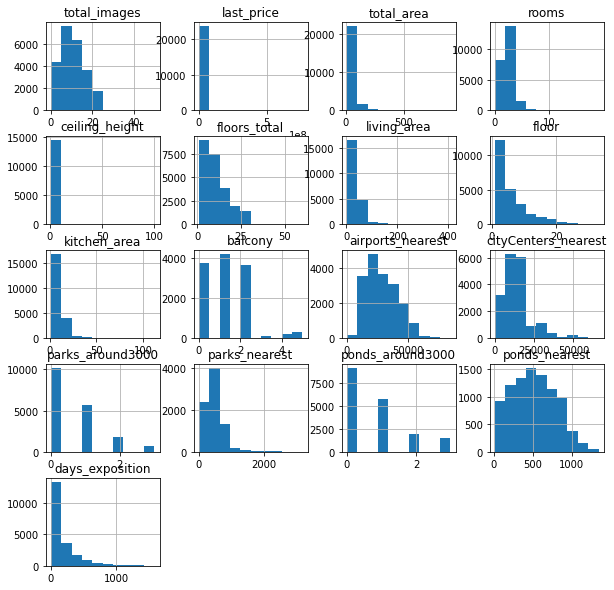

In [5]:
data.hist(figsize=(10, 10));

Видимых на первый взгляд аномалий в гистограммах не обнаружено. Данные распределены правдоподобно.

### Предобработка данных

####  Обработка пропущенных значений

##### Поиск стобцов с пропущенными значениями:

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Отображение процента пропущенных значений от общего числа значений:

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Видим пропущенные значения в 14 столбцах: 

    1) высота потолка (39% пропусков); 
    2) количество этажей (близко к 0%, крайне низкое значение); 
    3) площадь жилой зоны (8% пропусков); 
    4) информация о том, является ли недвижимость апартаментами (88% пропусков, крайне высокое значение); 
    5) площадь кухни (10% пропусков);
    6) количество балконов (49% пропусков); 
    7) населенный пункт (близко к 0% пропусков);
    8) расстояние до ближайшего аэропорта (23% пропусков); 
    9) расстояние до центра города (23%  пропусков);
    10) количество парков в радиусе 3 км (23% пропусков); 
    11) расстояние до ближайшего парка (66% пропусков);
    12) количество водоемов в радиусе 3 км (23% пропусков); 
    13) расстояние до ближайшего парка (62% пропусков);
    14) количество дней со дня публикации объявления (13% пропусков);

##### Заполнение пропусков

*1) Заполнение пропусков в столбце ceiling_height:*

Чтобы понять какими значениями можно заполнить пропуски, построим гистограмму (параметры корзин и диапазона выбраны таким образом, чтобы максимально наглядно показать распределение имеющихся значений)

<AxesSubplot:>

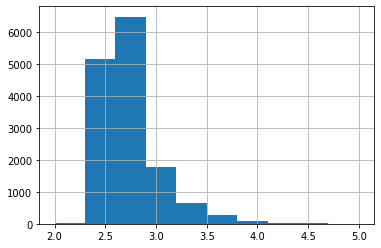

In [8]:
data["ceiling_height"].hist(bins=10, range=(2, 5))

Распределение значений близко к нормальному и унимодально, поэтому для заполнения пропусков можно использовать медиану:

In [9]:
data["ceiling_height"] = data["ceiling_height"].fillna(data["ceiling_height"].median())

Проверим, остались ли пропуски в столбце:

In [10]:
data["ceiling_height"].isna().sum()

0

*2) Заполнение пропусков в столбце floors_total:*

Причины, почему не указано количество этажей, могут быть разными. Например, в здании это единственный этаж, на котором расположена недвижимость. 

Проверим это предположение, выведя все объекты недвижимости, где указан первый этаж и не указано количество этажей в здании:

In [11]:
data.query("floor==1 and floors_total.isna()")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,2.65,NaN,NaN,1,NaN,...,NaN,0.0,посёлок Щеглово,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0
15989,1,4100000.0,74.50,2017-04-22T00:00:00,3,2.65,NaN,NaN,1,NaN,...,NaN,0.0,Красное Село,25382.0,28806.0,0.0,NaN,0.0,NaN,72.0


Количество таких объектов недвижимости невелико, значит, предположение неверно, причина появления пропусков другая. Для определения иных закономерностей в данных построим гистограмму:

<AxesSubplot:>

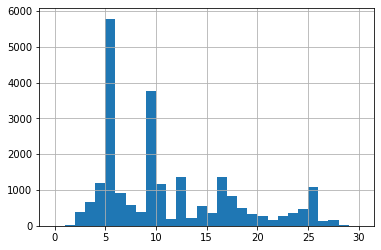

In [12]:
data["floors_total"].hist(bins=30, range=(0, 30))

В данных несколько пиков: судя по всему, среди домов преобладают пятиэтажки, девятиэтажки, 12-, 16- и 25- этажки. Просто взять медианное значение для замены пропущенных значений не получится, это исказит результаты.  

*3) Заполнение пропусков в столбце living_area и kitchen_area:*

Оценим как отличаются total_area, living_area и kitchen_area между собой:

In [13]:
data[["total_area", "living_area", "kitchen_area"]].head(10)

,total_area,living_area,kitchen_area
0,108.00,51.00,25.00
1,40.40,18.60,11.00
2,56.00,34.30,8.30
3,159.00,NaN,NaN
4,100.00,32.00,41.00
5,30.40,14.40,9.10
6,37.30,10.60,14.40
7,71.60,NaN,18.90
8,33.16,15.43,8.81
9,61.00,43.60,6.50


В основном, кухня меньше жилой зоны, при этом сумма площадей кухни и жилой зоны меньше общей площади недвижимости. 

Посмотрим, как соотносятся living_area к total_area, а также kitchen_area к total_area, построив гистограммы:

<AxesSubplot:>

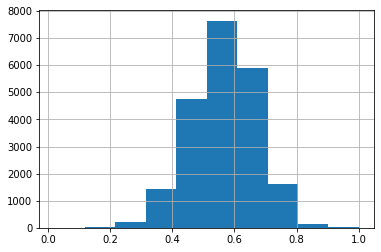

In [14]:
(data["living_area"]/data["total_area"]).hist()

<AxesSubplot:>

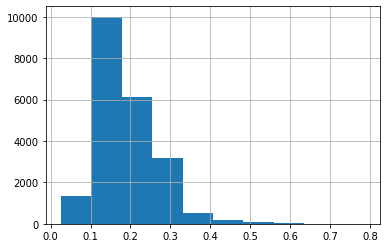

In [15]:
(data["kitchen_area"]/data["total_area"]).hist()

Оба распределения похожи на нормальные. Следовательно, для заполнения пропусков можно использовать медианные соотношения к общей площади:

In [16]:
data['living_area'] = data['living_area'].fillna(round(data["total_area"] * (data["living_area"]/data["total_area"]).median(), 2))


data['kitchen_area'] = data["kitchen_area"].fillna(round(data["total_area"] * (data["kitchen_area"]/data["total_area"]).median(), 2))

Проверим, остались ли пропуски в соответствующих столбцах:

In [17]:
data["living_area"].isna().sum()

0

In [18]:
data["kitchen_area"].isna().sum()

0

Пропусков в данных столбцах не осталось. Исследуем, какие данные могут рассмотрены, как аномалии. Проверим, сколько объектов недвижимости имеют общую площадь меньшую, чем суммарная площадь кухни и жилой площади:

In [19]:
data.query("kitchen_area +  living_area > total_area")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,...,16.90,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,NaN,...,4.67,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.65,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22246,6,3100000.0,27.30,2018-05-29T00:00:00,0,2.70,16.0,23.30,15,NaN,...,4.71,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0
22907,9,65000000.0,228.00,2016-06-02T00:00:00,4,2.65,5.0,200.00,2,NaN,...,39.31,NaN,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN
23102,0,5800000.0,66.00,2017-06-09T00:00:00,5,2.65,5.0,55.50,1,NaN,...,11.38,0.0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0
23191,3,1900000.0,18.90,2016-04-04T00:00:00,1,2.65,16.0,16.00,12,NaN,...,3.26,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0


Таких объектов всего 116 среди 23699. Скорее всего, их можно удалить без потери важной информации для анализа:

In [20]:
data = data.query("kitchen_area +  living_area <= total_area").reset_index(drop=True)

*4) Заполнение пропусков в столбце is_apartment :*

Наиболее вероятная причина пропусков в данном столбце - объект недвижимости не является апартаментами. Следовательно, пропуски можно заменить на значение False.

In [21]:
data["is_apartment"] = data["is_apartment"].fillna("False")

Проверим, все ли пропуски были обработаны:

In [22]:
data["is_apartment"].isna().sum()

0

*5) Заполнение пропусков в столбце balcony :*

Пропуск в данном столбце означает, что объект недвижимости не имеет балконов. 
Заполним пропуски нулевыми значениями:

In [23]:
data["balcony"] = data["balcony"].fillna(0)

Проверим, все ли пропуски были обработаны:

In [24]:
data["balcony"].isna().sum()

0

*6) Заполнение пропусков в столбце locality_name :*

Восстановить название населенного пункта по остальным данным невозможно, а удаление строк с пропусками может привести к потере данных, поэтому заменим пропущенные значение на unknown:

In [25]:
data["locality_name"] = data["locality_name"].fillna("unknown")

Проверим, все ли пропуски были обработаны:

In [26]:
data["locality_name"].isna().sum()

0

*7) Заполнение пропусков в столбцах parks_around3000, ponds_around3000  :*

Вероятно, что причина пропусков в том, что рядом с объектами недвижимости нет парков или водоемов в пределах 3 км. Заполним пропуски нулевыми значениями:

In [27]:
data["parks_around3000"] = data["parks_around3000"].fillna(0)
data["ponds_around3000"] = data["ponds_around3000"].fillna(0)

Проверим, обработаны все ли пропуски в данных стоблцах:

In [28]:
data["parks_around3000"].isna().sum()

0

In [29]:
data["ponds_around3000"].isna().sum()

0

*8) Заполнение пропусков в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest:*

Подобные данные невозможно более или менее точно восстановить лишь по данным анализируемого датасета. Например, много пропусков в airport_nearest принадлежат конкретным населенным пунктам (села и поселки):

In [30]:
data.query("airports_nearest.isna() == True").groupby("locality_name")["locality_name"].unique()

locality_name
unknown                              [unknown]
Бокситогорск                    [Бокситогорск]
Волосово                            [Волосово]
Волхов                                [Волхов]
Всеволожск                        [Всеволожск]
                                 ...          
село Путилово                  [село Путилово]
село Рождествено            [село Рождествено]
село Русско-Высоцкое    [село Русско-Высоцкое]
село Старая Ладога        [село Старая Ладога]
село Шум                            [село Шум]
Name: locality_name, Length: 345, dtype: object

Следовательно, непонятно, будет ли медиана адекватно отражать расстояния по данным населенным пунктам, если большинство данных известно только по городу:

In [31]:
data["locality_name"].value_counts()

Санкт-Петербург            15645
посёлок Мурино               513
посёлок Шушары               439
Всеволожск                   393
Пушкин                       369
                           ...  
деревня Раздолье               1
поселок Жилпосёлок             1
деревня Тихковицы              1
поселок станции Лужайка        1
посёлок Петро-Славянка         1
Name: locality_name, Length: 365, dtype: int64

Аналогичная ситуация с переменными cityCenters_nearest, parks_nearest, ponds_nearest. 


*9) Заполнение пропусков в столбце days_exposition:*

Пропуски на месте переменной days_exposition вероятно обозначают, что объект недвижимости не был продан. Следовательно, в какой-либо замене нет необходимости. При этом нулевое значение дней не подходит, это означало бы, что объект был продан в день подачи объявления, что являлось бы аномалией.

#### Изменение типов данных

Определим текущие типы у каждой переменной:

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23583 entries, 0 to 23582
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23583 non-null  int64  
 1   last_price            23583 non-null  float64
 2   total_area            23583 non-null  float64
 3   first_day_exposition  23583 non-null  object 
 4   rooms                 23583 non-null  int64  
 5   ceiling_height        23583 non-null  float64
 6   floors_total          23497 non-null  float64
 7   living_area           23583 non-null  float64
 8   floor                 23583 non-null  int64  
 9   is_apartment          23583 non-null  object 
 10  studio                23583 non-null  bool   
 11  open_plan             23583 non-null  bool   
 12  kitchen_area          23583 non-null  float64
 13  balcony               23583 non-null  float64
 14  locality_name         23583 non-null  object 
 15  airports_nearest   

Заменим типы там, где это необходимо:

Заменим строковый тип на специальный тип datetime для дат у переменной first_day_exposition:

In [33]:
data["first_day_exposition"] = pd.to_datetime(data["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S")

Заменим вещественный тип на целочисленный для количества этажей 
(т.к. количество не может быть дробным):

In [34]:
data["floors_total"] = data["floors_total"].fillna(-1).astype(int).replace(-1, np.nan).astype('Int64')

Заменим строковый тип на булев тип в is_apartment, 
поскольку ячейки столбца принимают только значения True или False:


In [35]:
data["is_apartment"] = data["is_apartment"].astype(bool)

Заменим вещественный тип на целочисленный для количества балконов
(т.к. количество не может быть дробным):

In [36]:
data["balcony"] = data["balcony"].astype('Int64')

Заменим вещественный тип на целочисленный для количества дней
(т.к. количество не может быть дробным):

In [37]:
data["days_exposition"] = data["days_exposition"].fillna(-1).astype(int).replace(-1, np.nan).astype('Int64')

Проверим, все ли типы были исправлены:

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23583 entries, 0 to 23582
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23583 non-null  int64         
 1   last_price            23583 non-null  float64       
 2   total_area            23583 non-null  float64       
 3   first_day_exposition  23583 non-null  datetime64[ns]
 4   rooms                 23583 non-null  int64         
 5   ceiling_height        23583 non-null  float64       
 6   floors_total          23497 non-null  Int64         
 7   living_area           23583 non-null  float64       
 8   floor                 23583 non-null  int64         
 9   is_apartment          23583 non-null  bool          
 10  studio                23583 non-null  bool          
 11  open_plan             23583 non-null  bool          
 12  kitchen_area          23583 non-null  float64       
 13  balcony         

#### Устранение дубликатов

##### Поиск явных дубликатов

In [39]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют в исследуемом датасете. 

##### Устранение неявных дубликатов

Посмотрим, какие есть уникальные значения в стоблце и их количество:

In [40]:
sorted(data["locality_name"].unique())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

In [41]:
len(sorted(data["locality_name"].unique()))

365

Устраним неявные дубликаты вида "поселок <название>", "посёлок <название>", "поселок городского типа <название>" и "городской поселок <название>" :

In [42]:
data["locality_name"] = data["locality_name"].str.replace("посёлок", "поселок")
data["locality_name"] = data["locality_name"].str.replace("поселок городского типа", "городской поселок")
data["locality_name"] = data["locality_name"].str.replace("городской поселок", "поселок")

In [43]:
sorted(data["locality_name"].unique())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня

Найдем все дубликаты вида "<название>" и "<тип населенного пункта> <название>":

In [44]:
single_names = ['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',]

double_names = ['деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 'деревня Горбунки',
 'деревня Гостилицы',
 'деревня Заклинье',
 'деревня Заневка',
 'деревня Зимитицы',
 'деревня Извара',
 'деревня Иссад',
 'деревня Калитино',
 'деревня Кальтино',
 'деревня Камышовка',
 'деревня Каськово',
 'деревня Келози',
 'деревня Кипень',
 'деревня Кисельня',
 'деревня Колтуши',
 'деревня Коркино',
 'деревня Котлы',
 'деревня Кривко',
 'деревня Кудрово',
 'деревня Кузьмолово',
 'деревня Курковицы',
 'деревня Куровицы',
 'деревня Куттузи',
 'деревня Лаврики',
 'деревня Лаголово',
 'деревня Лампово',
 'деревня Лесколово',
 'деревня Лопухинка',
 'деревня Лупполово',
 'деревня Малая Романовка',
 'деревня Малое Верево',
 'деревня Малое Карлино',
 'деревня Малые Колпаны',
 'деревня Мануйлово',
 'деревня Меньково',
 'деревня Мины',
 'деревня Мистолово',
 'деревня Ненимяки',
 'деревня Нижние Осельки',
 'деревня Нижняя',
 'деревня Низино',
 'деревня Новое Девяткино',
 'деревня Новолисино',
 'деревня Нурма',
 'деревня Оржицы',
 'деревня Парицы',
 'деревня Пельгора',
 'деревня Пеники',
 'деревня Пижма',
 'деревня Пикколово',
 'деревня Пудомяги',
 'деревня Пустынка',
 'деревня Пчева',
 'деревня Рабитицы',
 'деревня Разбегаево',
 'деревня Раздолье',
 'деревня Разметелево',
 'деревня Рапполово',
 'деревня Реброво',
 'деревня Русско',
 'деревня Сижно',
 'деревня Снегирёвка',
 'деревня Старая',
 'деревня Старая Пустошь',
 'деревня Старое Хинколово',
 'деревня Старополье',
 'деревня Старосиверская',
 'деревня Старые Бегуницы',
 'деревня Суоранда',
 'деревня Сяськелево',
 'деревня Тарасово',
 'деревня Терпилицы',
 'деревня Тихковицы',
 'деревня Тойворово',
 'деревня Торосово',
 'деревня Торошковичи',
 'деревня Трубников Бор',
 'деревня Фалилеево',
 'деревня Фёдоровское',
 'деревня Хапо-Ое',
 'деревня Хязельки',
 'деревня Чудской Бор',
 'деревня Шпаньково',
 'деревня Щеглово',
 'деревня Юкки',
 'деревня Ялгино',
 'деревня Яльгелево',
 'деревня Ям-Тесово',
 'коттеджный поселок Кивеннапа Север',
 'коттеджный поселок Лесное',
 'коттеджный поселок Счастье',
 'поселок Александровская',
 'поселок Алексеевка',
 'поселок Аннино',
 'поселок Барышево',
 'поселок Белоостров',
 'поселок Большая Ижора',
 'поселок Бугры',
 'поселок Будогощь',
 'поселок Важины',
 'поселок Виллози',
 'поселок Вознесенье',
 'поселок Возрождение',
 'поселок Войсковицы',
 'поселок Войскорово',
 'поселок Володарское',
 'поселок Вырица',
 'поселок Высокоключевой',
 'поселок Гаврилово',
 'поселок Гарболово',
 'поселок Гладкое',
 'поселок Глажево',
 'поселок Глебычево',
 'поселок Гончарово',
 'поселок Громово',
 'поселок Дзержинского',
 'поселок Дружная Горка',
 'поселок Дружноселье',
 'поселок Дубровка',
 'поселок Елизаветино',
 'поселок Ефимовский',
 'поселок Жилгородок',
 'поселок Жилпоселок',
 'поселок Житково',
 'поселок Заводской',
 'поселок Запорожское',
 'поселок Зимитицы',
 'поселок Ильичёво',
 'поселок Калитино',
 'поселок Каложицы',
 'поселок Кикерино',
 'поселок Кингисеппский',
 'поселок Кирпичное',
 'поселок Кобралово',
 'поселок Кобринское',
 'поселок Коммунары',
 'поселок Кондратьево',
 'поселок Коробицыно',
 'поселок Котельский',
 'поселок Красная Долина',
 'поселок Красносельское',
 'поселок Красный Бор',
 'поселок Кузнечное',
 'поселок Кузьмоловский',
 'поселок Лебяжье',
 'поселок Левашово',
 'поселок Ленинское',
 'поселок Лесное',
 'поселок Лесогорский',
 'поселок Лисий Нос',
 'поселок Лукаши',
 'поселок Любань',
 'поселок Мга',
 'поселок Мельниково',
 'поселок Металлострой',
 'поселок Мичуринское',
 'поселок Молодцово',
 'поселок Молодёжное',
 'поселок Мурино',
 'поселок Мыза-Ивановка',
 'поселок Назия',
 'поселок Никольский',
 'поселок Новогорелово',
 'поселок Новоселье',
 'поселок Новый Свет',
 'поселок Новый Учхоз',
 'поселок Оредеж',
 'поселок Павлово',
 'поселок Пансионат Зелёный Бор',
 'поселок Парголово',
 'поселок Первомайское',
 'поселок Перово',
 'поселок Песочный',
 'поселок Петро-Славянка',
 'поселок Петровское',
 'поселок Платформа 69-й километр',
 'поселок Плодовое',
 'поселок Плоское',
 'поселок Победа',
 'поселок Поляны',
 'поселок Понтонный',
 'поселок Почап',
 'поселок Починок',
 'поселок Пригородный',
 'поселок Приладожский',
 'поселок Пудость',
 'поселок Пушное',
 'поселок Пчевжа',
 'поселок Рабитицы',
 'поселок Рахья',
 'поселок Репино',
 'поселок Романовка',
 'поселок Ромашки',
 'поселок Ропша',
 'поселок Рощино',
 'поселок Рябово',
 'поселок Сапёрное',
 'поселок Сапёрный',
 'поселок Свирьстрой',
 'поселок Севастьяново',
 'поселок Селезнёво',
 'поселок Сельцо',
 'поселок Семиозерье',
 'поселок Семрино',
 'поселок Серебрянский',
 'поселок Сиверский',
 'поселок Синявино',
 'поселок Советский',
 'поселок Совхозный',
 'поселок Сосново',
 'поселок Старая Малукса',
 'поселок Стеклянный',
 'поселок Стрельна',
 'поселок Суйда',
 'поселок Сумино',
 'поселок Суходолье',
 'поселок Тайцы',
 'поселок Тельмана',
 'поселок Терволово',
 'поселок Токсово',
 'поселок Торковичи',
 'поселок Торфяное',
 'поселок Тёсово-4',
 'поселок Углово',
 'поселок Ульяновка',
 'поселок Усть-Ижора',
 'поселок Усть-Луга',
 'поселок Ушаки',
 'поселок Форносово',
 'поселок Форт Красная Горка',
 'поселок Фёдоровское',
 'поселок Цвелодубово',
 'поселок Цвылёво',
 'поселок Шугозеро',
 'поселок Шушары',
 'поселок Щеглово',
 'поселок Янино-1',
 'поселок имени Морозова',
 'поселок имени Свердлова',
 'поселок при железнодорожной станции Вещево',
 'поселок при железнодорожной станции Приветнинское',
 'поселок станции Вещево',
 'поселок станции Громово',
 'поселок станции Корнево',
 'поселок станции Лужайка',
 'поселок станции Приветнинское',
 'поселок станции Свирь',
 'садоводческое некоммерческое товарищество Лесная Поляна',
 'садовое товарищество Новая Ропша',
 'садовое товарищество Приладожский',
 'садовое товарищество Рахья',
 'садовое товарищество Садко',
 'село Копорье',
 'село Никольское',
 'село Павлово',
 'село Паша',
 'село Путилово',
 'село Рождествено',
 'село Русско-Высоцкое',
 'село Старая Ладога',
 'село Шум']

# Узнаем, какие топонимы нужно заменить на двойные:

for name in single_names:
    for double_name in double_names:
        if name in double_name:
            print(f"Оригинал: {name}")
            print(f"Предлагаемая замена: {double_name}")


Оригинал: Высоцк
Предлагаемая замена: село Русско-Высоцкое
Оригинал: Кингисепп
Предлагаемая замена: поселок Кингисеппский
Оригинал: Коммунар
Предлагаемая замена: поселок Коммунары
Оригинал: Кудрово
Предлагаемая замена: деревня Кудрово
Оригинал: Луга
Предлагаемая замена: поселок Усть-Луга
Оригинал: Любань
Предлагаемая замена: поселок Любань
Оригинал: Мурино
Предлагаемая замена: поселок Мурино
Оригинал: Никольское
Предлагаемая замена: село Никольское


Не все предложенные замены хороши, потому что есть очень похожие топонимы. Отберем вручную только те, что нуждаются в замене:

In [45]:
data["locality_name"] = data["locality_name"].replace("Кудрово", "деревня Кудрово")
data["locality_name"] = data["locality_name"].replace("Любань", "посёлок Любань")
data["locality_name"] = data["locality_name"].replace("Мурино", "посёлок Мурино")
data["locality_name"] = data["locality_name"].replace("Никольское", "село Никольское")

Проверим, насколько уменьшилось количество уникальных значений в столбце:

In [46]:
sorted(data["locality_name"].unique())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 'деревня Горбунки',
 'деревня Гостилиц

In [47]:
len(sorted(data["locality_name"].unique()))

321

#### Устранение аномалий в данных

Напишем функцию для удаления выбросов:

In [48]:
def delete_outliers(column):
    
    global data
    
    new_data = data.dropna()
    
    # посчитаем размер данных
    
    data_size = len(data[column].dropna())
    
    # находим первый и третий квартиль:
    
    q3, q1 = np.percentile(new_data[column], [75, 25])
    
    print(f'Первый квартиль - {q1}, третий квартиль - {q3}')
    
    # находим межквартильный размах:
    IQR = q3 - q1
    print(f'Межквартильный размах - {IQR}')

    # находим верхнюю и нижнюю границу данных
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    print(f'Верхняя граница - {upper_bound}')
    print(f'Нижняя граница - {lower_bound}')
    
    # удаляем выбросы вне границ
    
    data[column] = data[column][data[column] < upper_bound]
    data[column] = data[column][data[column] > lower_bound]
    
    # заново пересчитаем размер данных
    
    data_size_update = len(data[column].dropna())
    
    print(f'Процент выбросов составил {round( (1-data_size_update/data_size) *100,2) } %')

Построим график boxplot для каждой переменной:

*1) Устранение выбросов в переменной last_price:*

<AxesSubplot:>

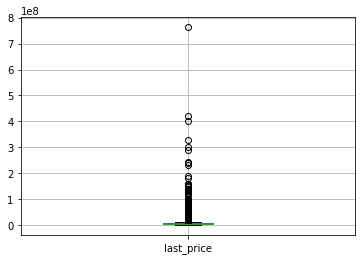

In [49]:
data.boxplot(column="last_price")

Видно, что на диаграмме довольно много выбросов. Удалим их с помощью разработанной функции:

In [50]:
delete_outliers("last_price")

Первый квартиль - 4300000.0, третий квартиль - 9400000.0
Межквартильный размах - 5100000.0
Верхняя граница - 17050000.0
Нижняя граница - -3350000.0
Процент выбросов составил 3.98 %


Данные показывают, что основная часть данных находится в диапазоне от 4,3 млн до 9,4 млн, верхняя граница данных составляет 17 млн (нижняя граница получилась отрицательной, для наших данных это означает только то, что в данных присутствуют только экстремально высокие значения). 

Построим новую диаграмму boxplot:

<AxesSubplot:>

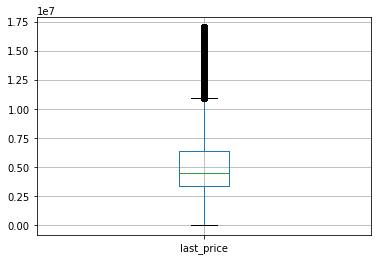

In [51]:
data.boxplot(column="last_price")

Видим, что теперь выбросов стало намного меньше.

*2) Устранение выбросов в переменной total_area*

Построим диаграмму boxplot. Видим достаточно большое количество аномально высоких значений.

<AxesSubplot:>

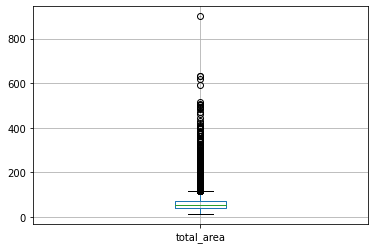

In [52]:
data.boxplot(column="total_area")

Устраним выбросы с помощью функции:

In [53]:
delete_outliers("total_area")

Первый квартиль - 42.0, третий квартиль - 74.0
Межквартильный размах - 32.0
Верхняя граница - 122.0
Нижняя граница - -6.0
Процент выбросов составил 4.33 %


По данным функциям наблюдаем, что большинство данных находится в диапазоне от 42 до 74 кв.м, верхняя граница данных составляет 122 кв.м

Построим новый график boxplot:

<AxesSubplot:>

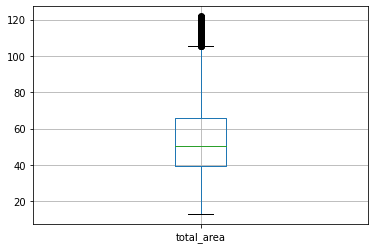

In [54]:
data.boxplot(column="total_area")

Наблюдаем улучшение: выбросов остается очень мало.

*3) Устранение выбросов в переменной rooms:*

Построим диаграмму boxplot:

<AxesSubplot:>

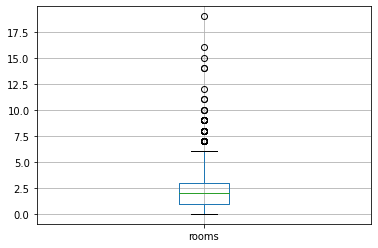

In [55]:
data.boxplot(column="rooms")

Выбросы в данных есть, но они единичные. Удалим их:

In [56]:
delete_outliers("rooms")

Первый квартиль - 1.0, третий квартиль - 3.0
Межквартильный размах - 2.0
Верхняя граница - 6.0
Нижняя граница - -2.0
Процент выбросов составил 0.82 %


Большинство данных находится в диапазоне от 1 до 3 комнат (что полностью согласуется с наблюдениями из реального мира, где наиболее представлены однокомнатные, двухкомнатные и трехкомнатные квартиры), верхняя граница - шесть комнат.

Заново построим график:

<AxesSubplot:>

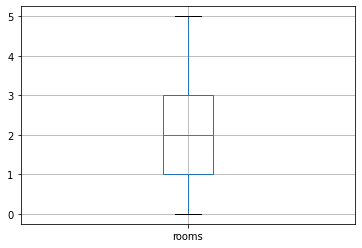

In [57]:
data.boxplot(column="rooms")

Достигнут идеальный результат - выбросы отсутствуют.

*4) Устранение выбросов в переменной ceiling_height:*

Построим диаграмму boxplot: 

<AxesSubplot:>

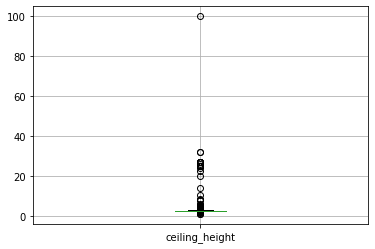

In [58]:
data.boxplot(column="ceiling_height")

Присутствуют выбросы, как аномально высокие потолки (до 100 метров), так и аномальные низкие. Необходимо устранить их:

In [59]:
delete_outliers("ceiling_height")

Первый квартиль - 2.6, третий квартиль - 2.75
Межквартильный размах - 0.1499999999999999
Верхняя граница - 2.9749999999999996
Нижняя граница - 2.375
Процент выбросов составил 11.22 %


Большинство потолков находятся в диапазоне от 2,6 м до 2,75, нижняя граница - 2,375 м, верхняя граница примерно 3 м.

Построим новый график после удаления аномальных значений:

<AxesSubplot:>

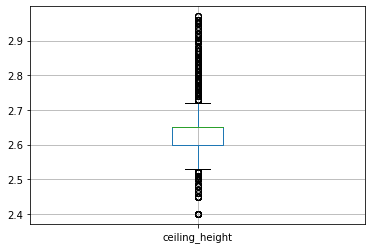

In [60]:
data.boxplot(column="ceiling_height")

Аномальные значения присутствуют, но в меньшем количестве, а также гораздо менее удаленны от основного набора данных, чем на предыдущем графике.

*5) Устранение выбросов в переменной floors_total*

Построим график boxlplot:

<AxesSubplot:>

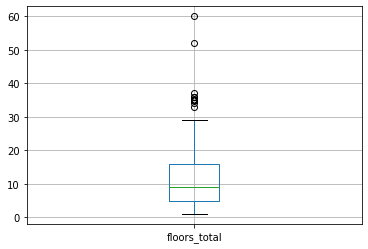

In [61]:
data.boxplot(column="floors_total")

Исходя из графика, большинство данных находятся до значения 30. Это соответствует реалиям: большинство зданий имеют не более 30 этажей. Устраним выбросы в данных:

In [62]:
delete_outliers("floors_total")

Первый квартиль - 5.0, третий квартиль - 13.0
Межквартильный размах - 8.0
Верхняя граница - 25.0
Нижняя граница - -7.0
Процент выбросов составил 5.98 %


Согласно полученным результатам, большинство зданий имеют от 5 до 13 этажей. Верхняя граница данных составляет 25 этажей.

Заново построим диаграмму boxplot:

<AxesSubplot:>

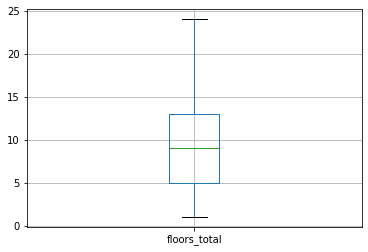

In [63]:
data.boxplot(column="floors_total")

Достигнут наилучший результат: выбросы в данных полностью отсутствуют.

*6) Устранение выбросов в переменной living_area:*

Построим диаграмму boxplot:

<AxesSubplot:>

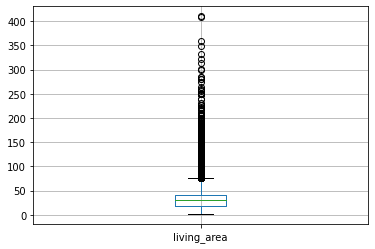

In [64]:
data.boxplot(column="living_area")

Наблюдаем картинку аномально высоких выбросов. Удалим их:

In [65]:
delete_outliers("living_area")

Первый квартиль - 19.1, третий квартиль - 40.8
Межквартильный размах - 21.699999999999996
Верхняя граница - 73.35
Нижняя граница - -13.449999999999996
Процент выбросов составил 4.24 %


Большинство квартир имеют площадь жилой зоны от 19 до 40 кв.м. Верхняя граница - 73 кв.м.

Построим новый график:

<AxesSubplot:>

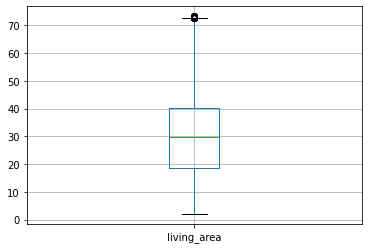

In [66]:
data.boxplot(column="living_area")

На графике практически нет выбросов.

*7) Устранение выбросов в переменной kitchen_area:*

Построим график boxplot:

<AxesSubplot:>

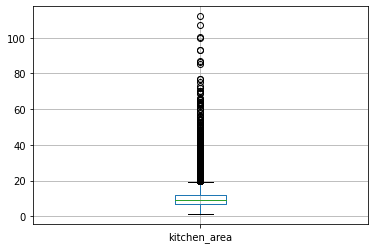

In [67]:
data.boxplot(column="kitchen_area")

Видим на графике множество аномально высоких значений. Устраним их:

In [68]:
delete_outliers("kitchen_area")

Первый квартиль - 7.0, третий квартиль - 11.405000000000001
Межквартильный размах - 4.405000000000001
Верхняя граница - 18.012500000000003
Нижняя граница - 0.3924999999999983
Процент выбросов составил 6.51 %


Согласно полученным данным, большинство квартир имеют площадь кухни от 7 кв.м до 11,4 кв.м. Верхняя граница - 18 кв.м.

Построим новый график:

<AxesSubplot:>

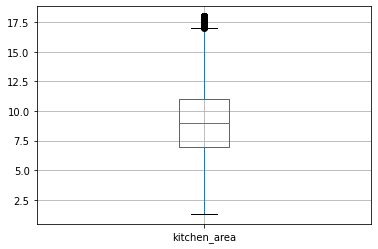

In [69]:
data.boxplot(column="kitchen_area")

*8) Устранение выбросов в переменной airports_nearest:*

Построим график boxplot:

<AxesSubplot:>

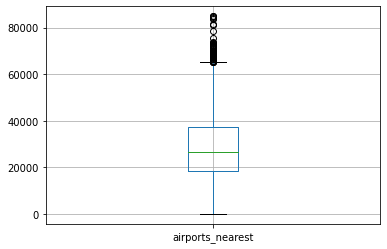

In [70]:
data.boxplot(column="airports_nearest")

Видим относительно небольшие выбросы вверху графика. Устраним их:

In [71]:
delete_outliers("airports_nearest")

Первый квартиль - 18545.0, третий квартиль - 35955.0
Межквартильный размах - 17410.0
Верхняя граница - 62070.0
Нижняя граница - -7570.0
Процент выбросов составил 0.69 %


Данные находятся в диапазоне от 18 км до 36 км. Верхняя граница составляет 62 км.

Построим новый график:

<AxesSubplot:>

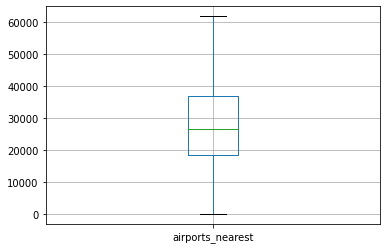

In [72]:
data.boxplot(column="airports_nearest")

Достигнут идеальный результат: выбросы на графике отсутствуют.

*9) Устранение выбросов в переменной cityCenters_nearest:*

Построим график boxplot:

<AxesSubplot:>

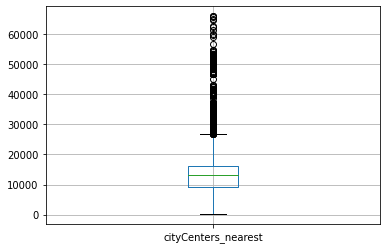

In [73]:
data.boxplot(column="cityCenters_nearest")

Наблюдаем картину аномально больших выбросов. Устраним их:

In [74]:
delete_outliers("cityCenters_nearest")

Первый квартиль - 8866.5, третий квартиль - 15563.75
Межквартильный размах - 6697.25
Верхняя граница - 25609.625
Нижняя граница - -1179.375
Процент выбросов составил 10.36 %


Большинство данных находятся в диапазоне от 8,8 км до 15,5 км. Верхняя граница - 25 км.

Построим новый график:

<AxesSubplot:>

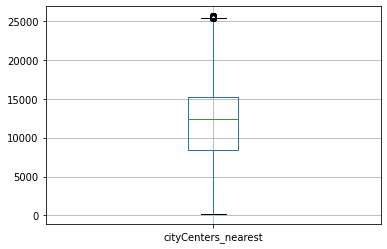

In [75]:
data.boxplot(column="cityCenters_nearest")

На новом графике практически нет выбросов.

*10) Устранение выбросов в переменной parks_nearest:*

Построим график boxplot:

<AxesSubplot:>

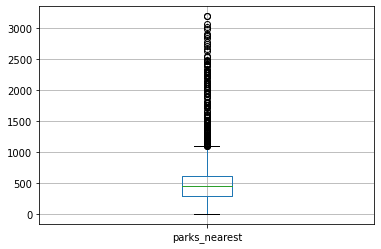

In [76]:
data.boxplot(column="parks_nearest")

Наблюдаем картину множественных выбросов, устраним их:

In [77]:
delete_outliers("parks_nearest")

Первый квартиль - 310.75, третий квартиль - 637.0
Межквартильный размах - 326.25
Верхняя граница - 1126.375
Нижняя граница - -178.625
Процент выбросов составил 3.78 %


Большинство данных находится в диапазоне от 310 м до 637 м. Верхняя граница составляет 1126 метров.

Построим новый график:

<AxesSubplot:>

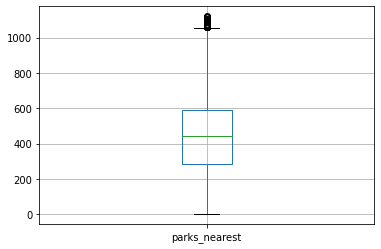

In [78]:
data.boxplot(column="parks_nearest")

На новом графике практически не наблюдаются выбросы.

*11) Устранение выбросов в переменной ponds_nearest:*

Построим график boxplot:

<AxesSubplot:>

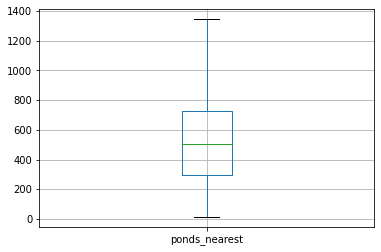

In [79]:
data.boxplot(column="ponds_nearest")

Выбросы в данных отсутствуют.

*12) Устранение выбросов в переменной days_exposition:*

Построим график boxplot:

<AxesSubplot:>

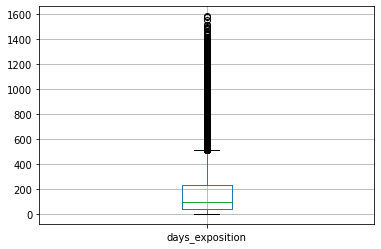

In [80]:
data.boxplot(column="days_exposition")

На полученном графике видим аномально высокие значения. Устраним их:

In [81]:
delete_outliers("days_exposition")

Первый квартиль - 39.0, третий квартиль - 213.75
Межквартильный размах - 174.75
Верхняя граница - 475.875
Нижняя граница - -223.125
Процент выбросов составил 9.42 %


Большинство данных находятся в диапазоне от 39 дней до 213 дней. Верхняя граница составляет 223 дня.

Построим новый график:

<AxesSubplot:>

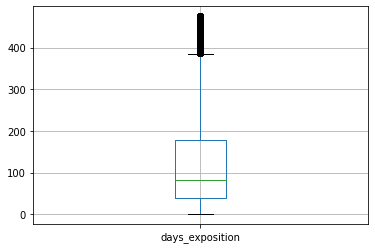

In [82]:
data.boxplot(column="days_exposition")

Выбросов стало намного меньше.

**Итог:** В исходных данных наблюдались пропущенные значения (вплоть до 88% для одной из переменных), дубликаты в населенных пунктах и выбросы (максимальное значение составило 11% от общего числа данных в столбце). По завершению этапа предобработки данных эти моменты были устранены. 

### Проведение расчетов и добавление новых параметров в таблицу

*1. Добавление столбца с ценой одного квадратного метра:*

In [83]:
data["price_for_square_meter"] = round(data["last_price"] / data["total_area"], 2)

*2. Добавление столбца с днем недели публикации объявления:*

In [84]:
data["weekday"] = data["first_day_exposition"].dt.dayofweek

*3. Добавление столбца с месяцем публикации объявления:*

In [85]:
data["month"] = data["first_day_exposition"].dt.month

*4. Добавление столбца с годом публикации объявления:*

In [86]:
data["year"] = data["first_day_exposition"].dt.year

*5. Добавление столбца с типом этажа:*

In [87]:
data["floor_type"] = 'другой'

data.loc[data["floor"] == 1, "floor_type"] = 'первый'

data.loc[data["floor"] == data["floors_total"], "floor_type"] = 'последний'

*6. добавление столбца с расстоянием в км до центра города:*

In [88]:
data["cityCenters_km"] = data["cityCenters_nearest"] / 1000

data["cityCenters_km"] = data["cityCenters_km"].fillna(-1).astype(int).replace(-1, np.nan).astype('Int64')

Проверим, все ли новые стоблцы на месте:

In [89]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,weekday,month,year,floor_type,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.0,8,True,...,482.0,2.0,755.0,<NA>,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1.0,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81,82920.79,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2.0,2.65,5,34.3,4,True,...,90.0,2.0,574.0,<NA>,92785.71,3,8,2015,другой,13
3,0,NaN,NaN,2015-07-24,3.0,2.65,14,NaN,9,True,...,84.0,3.0,234.0,424,NaN,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2.0,NaN,14,32.0,13,True,...,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,8


### Исследовательский анализ данных

#### Описание параметров

*1) Общая площадь*

Вывод общих параметров (среднее, минимальное и максимальное значение, квартили):

In [90]:
data["total_area"].describe()

count    22561.000000
mean        55.014098
std         20.245278
min         13.000000
25%         39.700000
50%         50.600000
75%         66.100000
max        121.800000
Name: total_area, dtype: float64

Распределение данных:

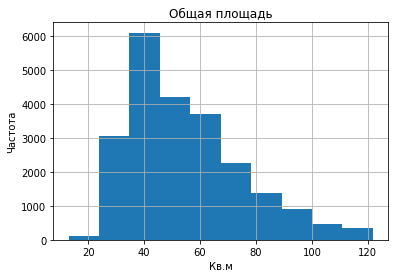

In [91]:
data["total_area"].hist()
plt.title('Общая площадь')
plt.ylabel('Частота')
plt.xlabel('Кв.м')
plt.show()

Большая часть квартир обладает площадью от 39 до 66 кв.метров, максимум составляет 121 кв.метров, минимум составляет 13 кв.метров.

*2) Жилая площадь*

In [92]:
data["living_area"].describe()

count    22584.000000
mean        31.269062
std         13.413353
min          2.000000
25%         18.620000
50%         29.900000
75%         40.200000
max         73.300000
Name: living_area, dtype: float64

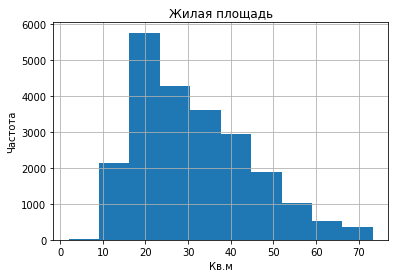

In [93]:
data["living_area"].hist()
plt.title('Жилая площадь')
plt.ylabel('Частота')
plt.xlabel('Кв.м')
plt.show()

Большинство квартир имеет площадь жилой зоны от 18 до 40 кв.м, максимум составляет 73 кв.м, минимум - 2 кв.м.

*3) Площадь кухни*

In [94]:
data["kitchen_area"].describe()

count    22047.000000
mean         9.311021
std          3.038488
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         18.000000
Name: kitchen_area, dtype: float64

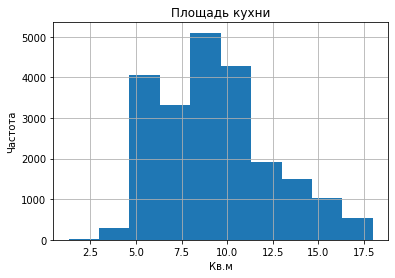

In [95]:
data["kitchen_area"].hist()
plt.title('Площадь кухни')
plt.ylabel('Частота')
plt.xlabel('Кв.м')
plt.show()

Большинство квартир имеет площадь кухни от 7 до 11 кв.м, максимум составляет 18 кв.м, минимум - 1 кв.м.

*4) Цена объекта*

In [96]:
(data["last_price"]/1_000_000).describe()

count    22644.000000
mean         5.289332
std          2.941546
min          0.012190
25%          3.400000
50%          4.500000
75%          6.400000
max         17.000000
Name: last_price, dtype: float64

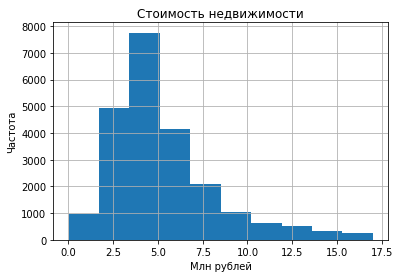

In [97]:
(data["last_price"]/1_000_000).hist()
plt.title('Стоимость недвижимости')
plt.ylabel('Частота')
plt.xlabel('Млн рублей')
plt.show()

Большинство объектов недвижимости имеют стоимость от 3,4 млн до 6,4 млн рублей. Максимальная цена составляет 17 млн рублей.

*5) Количество комнат*

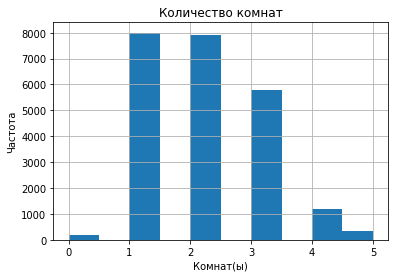

In [98]:
data["rooms"].hist()
plt.title('Количество комнат')
plt.ylabel('Частота')
plt.xlabel('Комнат(ы)')
plt.show()

Наблюдаем, что большинство объектов недвижимости имеет меньше 3 комнат.

*6) Высота потолков*

In [99]:
data["ceiling_height"].describe()

count    20936.000000
mean         2.634363
std          0.087155
min          2.400000
25%          2.600000
50%          2.650000
75%          2.650000
max          2.970000
Name: ceiling_height, dtype: float64

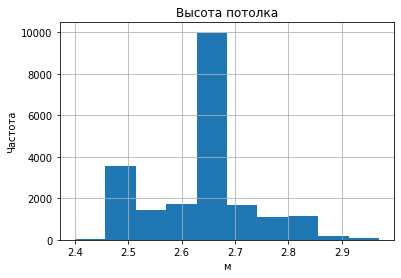

In [100]:
data["ceiling_height"].hist()
plt.title('Высота потолка')
plt.ylabel('Частота')
plt.xlabel('м')
plt.show()

Можно предположить, что стандарт высоты потолков при строительстве для большинства квартир между 2,6 и 2,7 метров.

*7) Этаж квартиры*

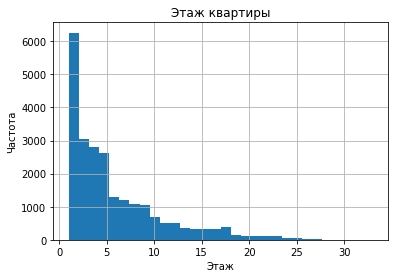

In [101]:
data["floor"].hist(bins=30)
plt.title('Этаж квартиры')
plt.ylabel('Частота')
plt.xlabel('Этаж')
plt.show()

Большинство квартир расположены от 1 до 5 этажа, это тоже говорит о том, какие многостройки обычно присутствуют в изучаемых населенных пунктах.

*8) Тип этажа*

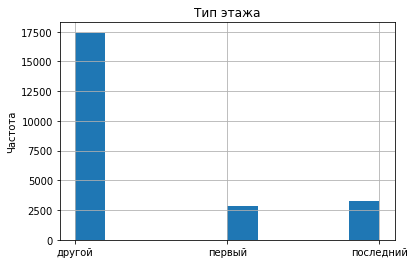

In [102]:
data["floor_type"].hist()
plt.title('Тип этажа')
plt.ylabel('Частота')
plt.show()

Данные ничем не примечательны: очевидно, что первый и последний этаж будет встречаться намного реже, чем какой-либо другой, потому что вероятность встретить любой этаж примерно одинакова. 

*9) Количество этажей*

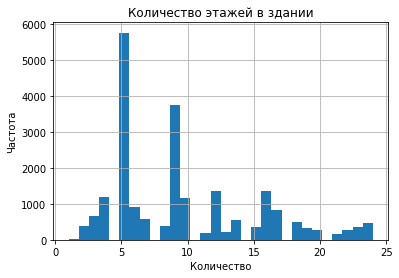

In [103]:
data["floors_total"].hist(bins=30)
plt.title('Количество этажей в здании')
plt.ylabel('Частота')
plt.xlabel('Количество')
plt.show()

По данным видно, что наиболее часто встречаются 5-этажки и 9-этажки среди домов.

*10) Расстояние до центра города в м*

In [104]:
data["cityCenters_nearest"].describe()

count    16223.000000
mean     11902.385749
std       5010.058065
min        181.000000
25%       8460.000000
50%      12423.000000
75%      15228.000000
max      25607.000000
Name: cityCenters_nearest, dtype: float64

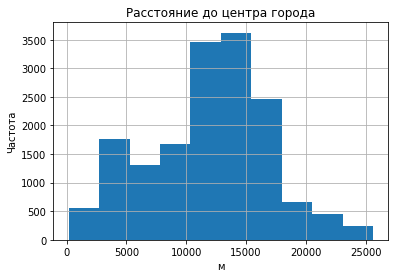

In [105]:
data["cityCenters_nearest"].hist()
plt.title('Расстояние до центра города')
plt.ylabel('Частота')
plt.xlabel('м')
plt.show()

Большинство квартир примерно находятся от 8.4 до 15.2 км от центра города.

*11) Расстояние до ближайшего аэропорта*

In [106]:
data["airports_nearest"].describe()

count    17950.000000
mean     28520.611866
std      12208.588422
min          0.000000
25%      18545.000000
50%      26585.000000
75%      36953.000000
max      61908.000000
Name: airports_nearest, dtype: float64

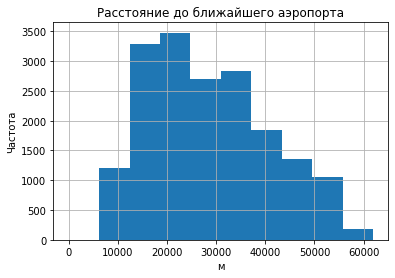

In [107]:
data["airports_nearest"].hist()
plt.title('Расстояние до ближайшего аэропорта')
plt.ylabel('Частота')
plt.xlabel('м')
plt.show()

Видим картину примерно равномерного распределения: нельзя прогнозировать, как удален будет объект недвижимости от аэропорта, равно представлены разные значения.

*12) Расстояние до ближайшего парка*

In [108]:
data["parks_nearest"].describe()

count    7741.000000
mean      441.680403
std       216.910611
min         1.000000
25%       283.000000
50%       442.000000
75%       592.000000
max      1120.000000
Name: parks_nearest, dtype: float64

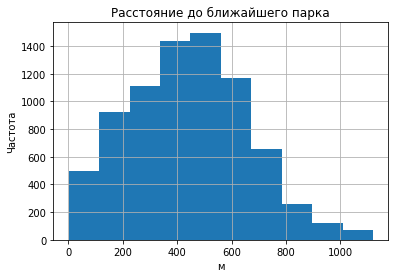

In [109]:
data["parks_nearest"].hist()
plt.title('Расстояние до ближайшего парка')
plt.ylabel('Частота')
plt.xlabel('м')
plt.show()

Большинство объектов недвижимости имеют парк не ближе 283 и не дальше 592 метров.

*12) День и месяц публикации объявления:*

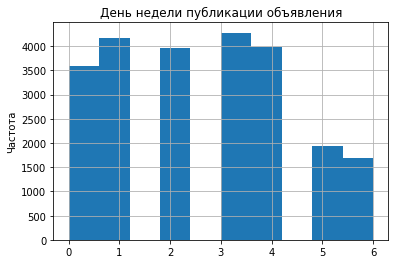

In [110]:
data["weekday"].hist()
plt.title('День недели публикации объявления')
plt.ylabel('Частота')
plt.show()

Большиство объявлений публикуется на рабочей неделе, меньше всего - в выходные.

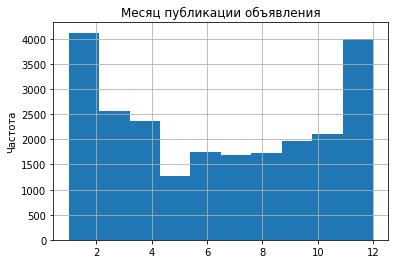

In [111]:
data["month"].hist()
plt.title('Месяц публикации объявления')
plt.ylabel('Частота')
plt.show()

Большиство объявлений публикуются в начале года или в конце года.

#### Изучение столбца days_exposition

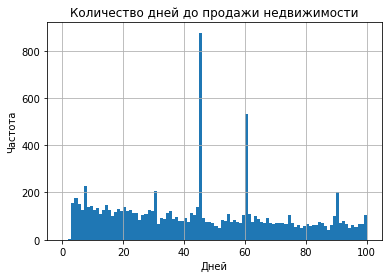

In [112]:
data["days_exposition"].hist(range=(0,100), bins=100)
plt.title('Количество дней до продажи недвижимости')
plt.ylabel('Частота')
plt.xlabel('Дней')
plt.show()

In [113]:
data["days_exposition"].describe()

count    18490.000000
mean       123.733423
std        114.448362
min          1.000000
25%         40.000000
50%         83.000000
75%        178.000000
max        475.000000
Name: days_exposition, dtype: float64

Большая часть продаж осуществлялось в срок до 123 дней. При этом значение медианы равно 83 дня, так происходит из-за того, что часть продаж являются чрезвычайно долгими. Исходя из показателей первого и третьего квартиля, необычно быстрыми продажами будем считать те, что произошли в период до 40 дней, а необычно долгими - в срок более чем 178 дней.

На гистограмме наблюдаем два пика: 46 дней и 60 дней. Вероятно, данные пики связаны с работой платформы. Возможно, в этот период объявления автоматически пропадают из выдачи.

#### Изучение факторов, от которых зависит полная стоимость объекта

*1) Изучение зависимости стоимости объекта от общей площади:*

Построим диаграмму рассеивания:

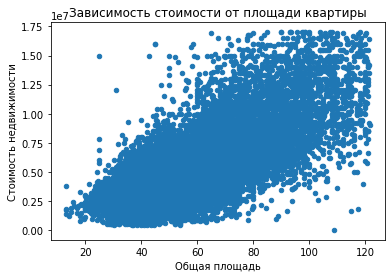

In [114]:
data.plot(x="total_area", y="last_price", kind="scatter")
plt.title('Зависимость стоимости от площади квартиры')
plt.ylabel('Стоимость недвижимости')
plt.xlabel('Общая площадь')
plt.show();

Вычислим коэффициент корреляции Пирсона:

In [115]:
data['last_price'].corr(data['total_area'])

0.7377248167020665

**Вывод**: Между общей площадью и стоимостью объекта есть сильная положительная корреляция.

*2) Изучение зависимости стоимости объекта от жилой площади:*

Построим диаграмму рассеивания:

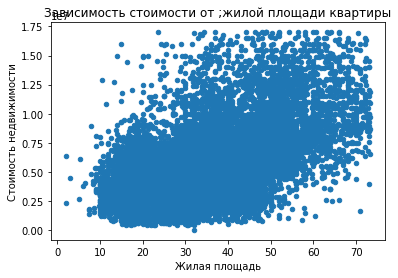

In [116]:
data.plot(x="living_area", y="last_price", kind="scatter")
plt.title('Зависимость стоимости от ;жилой площади квартиры')
plt.ylabel('Стоимость недвижимости')
plt.xlabel('Жилая площадь')
plt.show();

Вычислим коэффициент корреляции Пирсона:

In [117]:
data['last_price'].corr(data['living_area'])

0.6031080168667082

**Вывод**: Между жилой площадью и стоимостью объекта есть средняя положительная корреляция.

*3) Изучение зависимости стоимости объекта от площади кухни:*

Построим диаграмму рассеивания:

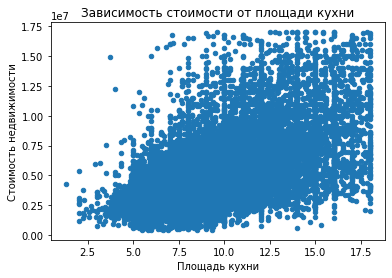

In [118]:
data.plot(x="kitchen_area", y="last_price", kind="scatter")
plt.title('Зависимость стоимости от площади кухни')
plt.ylabel('Стоимость недвижимости')
plt.xlabel('Площадь кухни')
plt.show();

Вычислим коэффициент корреляции Пирсона:

In [119]:
data['last_price'].corr(data['kitchen_area'])

0.5452081073682755

**Вывод**: Между площадью кухни и стоимостью объекта присутствует слабая положительная корреляция.

*4) Изучение зависимости стоимости объекта от количества комнат:*

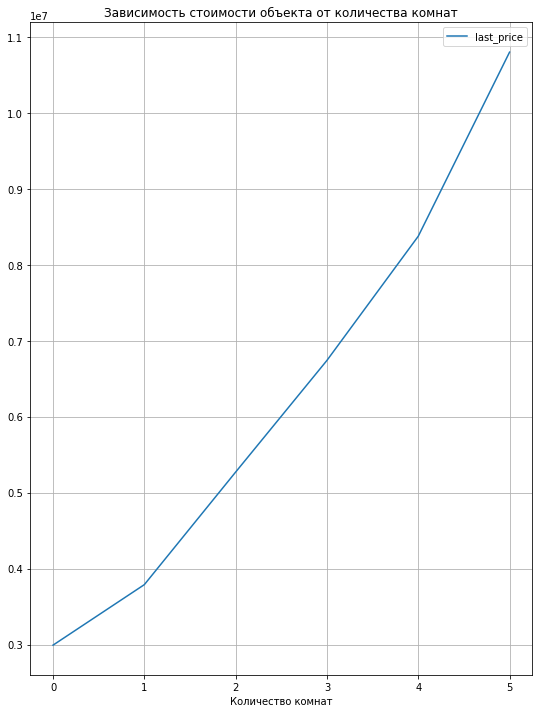

In [120]:
data.pivot_table(index="rooms", values="last_price", aggfunc="mean").plot(grid=True, figsize=(9,12))
plt.title('Зависимость стоимости объекта от количества комнат')
plt.xlabel('Количество комнат')
plt.show()

**Вывод**: Количество комнат прямо пропорционально влияет на полную стоимость объекта.

*5) Изучение зависимости стоимости объекта от типа этажа:*

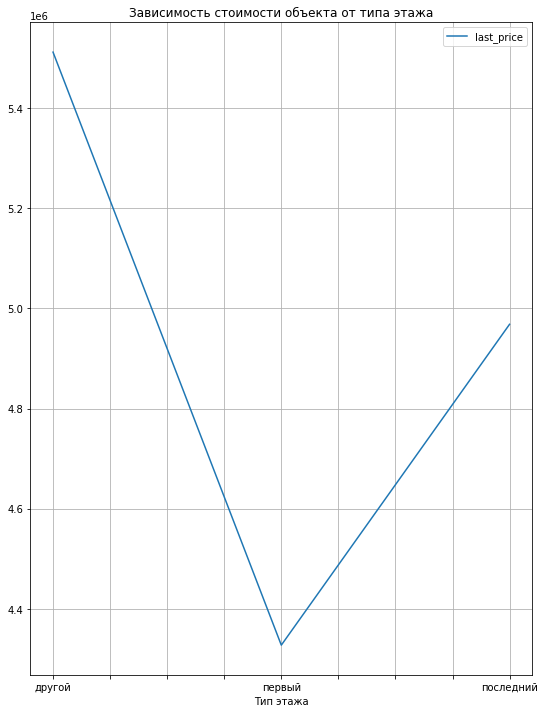

In [121]:
data.pivot_table(index="floor_type", values="last_price", aggfunc="mean").plot(grid=True, figsize=(9,12))
plt.title('Зависимость стоимости объекта от типа этажа')
plt.xlabel('Тип этажа')
plt.show()

**Вывод**: Объекты недвижимости на первом этаже являются наиболее дешевыми, за ними следуют объекты на последнем этаже, и наиболее дорогие объект расположены на других этажах.

*6) Изучение зависимости стоимости объекта от дня недели, месяца и года:*

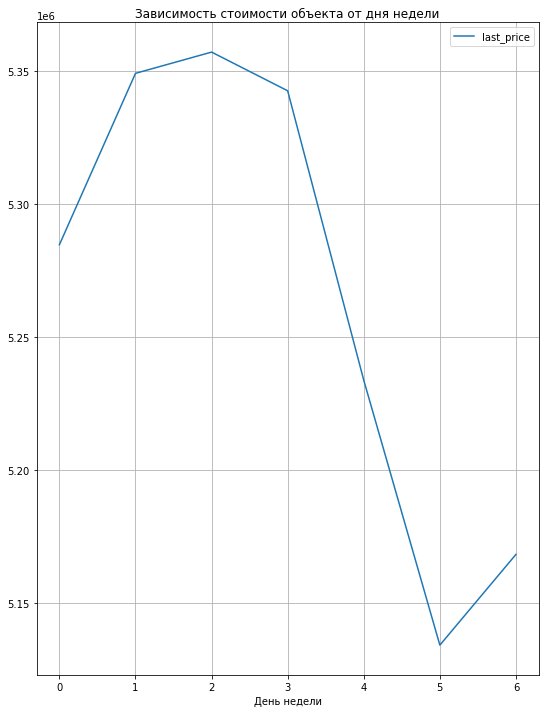

In [122]:
data.pivot_table(index="weekday", values="last_price", aggfunc="mean").plot(grid=True, figsize=(9,12))
plt.title('Зависимость стоимости объекта от дня недели')
plt.xlabel('День недели')
plt.show()

Помня о корреляции двух величин (стоимости и площади объекта), построим новый график:

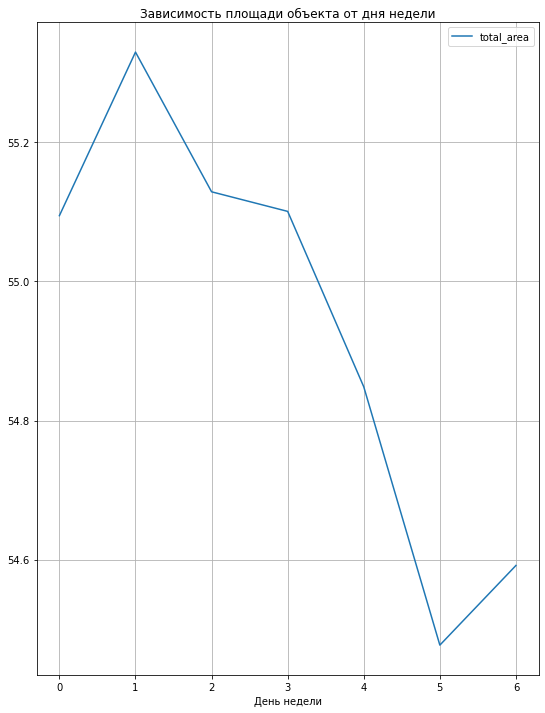

In [123]:
data.pivot_table(index="weekday", values="total_area", aggfunc="mean").plot(grid=True, figsize=(9,12))
plt.title('Зависимость площади объекта от дня недели')
plt.xlabel('День недели')
plt.show()

**Вывод:** Полная стоимость обьекта, как правило, выше в начале и середине недели, чем в конце недели. Это связано с тем, что тогда выставляются на продажу квартиры с меньшей площадью.

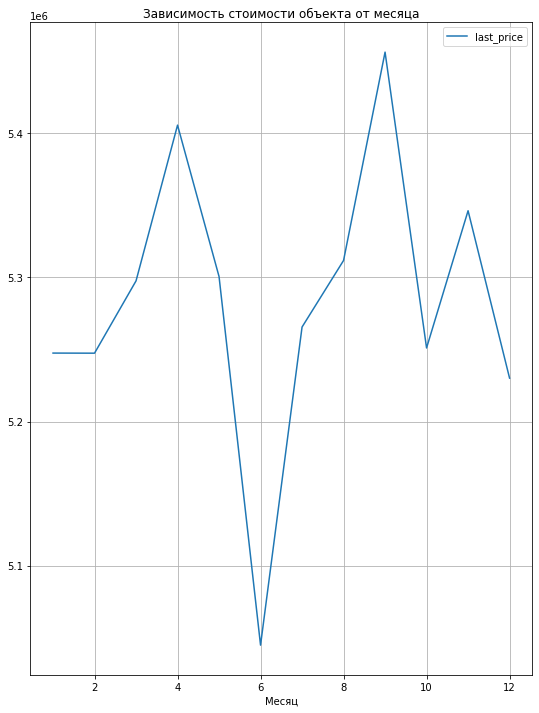

In [124]:
data.pivot_table(index="month", values="last_price", aggfunc="mean").plot(grid=True, figsize=(9,12))
plt.title('Зависимость стоимости объекта от месяца')
plt.xlabel('Месяц')
plt.show()

Помня о корреляции двух величин (стоимости и площади объекта), построим новый график:

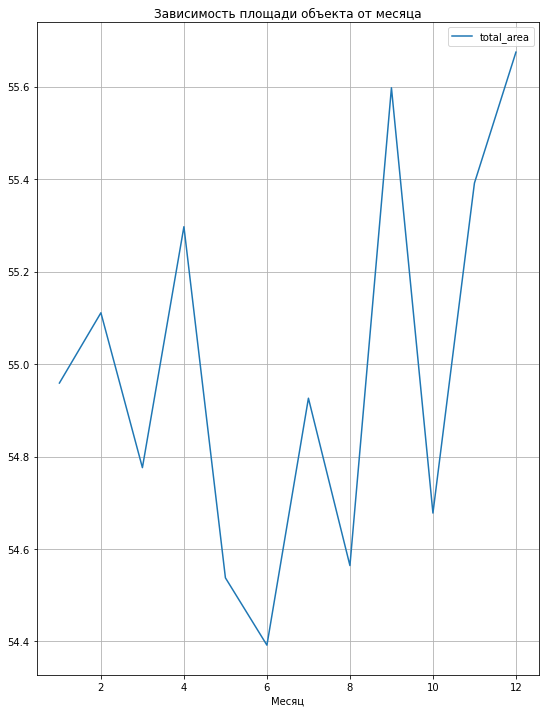

In [125]:
data.pivot_table(index="month", values="total_area", aggfunc="mean").plot(grid=True, figsize=(9,12))
plt.title('Зависимость площади объекта от месяца')
plt.xlabel('Месяц')
plt.show()

**Вывод:** Наименьшая стоимость объектов наблюдается в июне: тогда выставляются на продажу квартиры с наименьшей площадью.

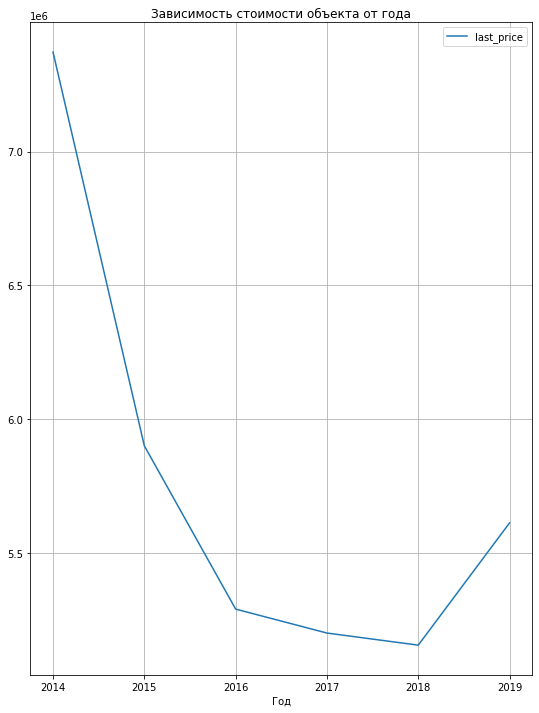

In [126]:
data.pivot_table(index="year", values="last_price", aggfunc="mean").plot(grid=True, figsize=(9,12))
plt.title('Зависимость стоимости объекта от года')
plt.xlabel('Год')
plt.show()

**Вывод:** С 2014 года наблюдаем тренд на снижении цены на недвижимость. Так цена сильно коррелирует с площадью недвижимости, проверим, как изменилась средняя площадь за этот же период:

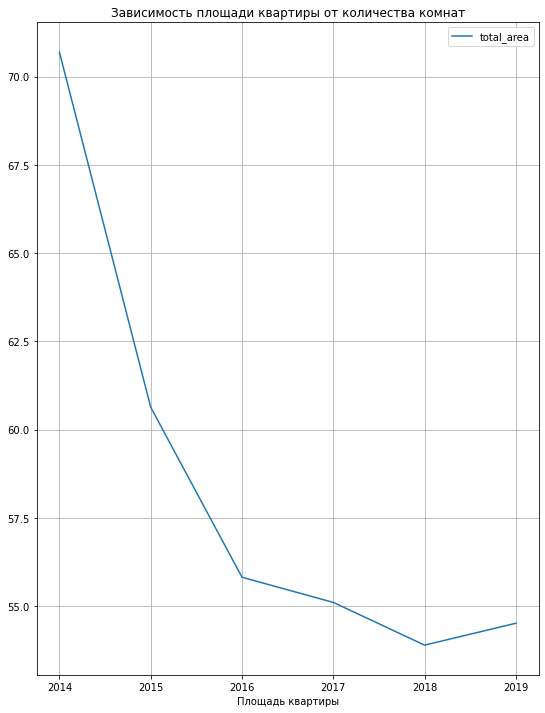

In [127]:
data.pivot_table(index="year", values="total_area", aggfunc="mean").plot(grid=True, figsize=(9,12))
plt.title('Зависимость площади квартиры от количества комнат')
plt.xlabel('Площадь квартиры')
plt.show()

График показывает снижение площади продаваемых квартир. Можно предположить, что к 2024 году данный тренд сохранится.

#### Цена квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений

In [128]:
# найдем 10 населенных пунктов с наибольшим количество объявлений

locations_top_10 = data.groupby("locality_name")["locality_name"].count().sort_values(ascending=False).head(10).index.to_list()

# вычислим среднее для каждой локации

means = []

for location in locations_top_10:
    means.append(data.query("locality_name == @location")["price_for_square_meter"].mean())
    
location_means = pd.Series(means, index=locations_top_10)
location_means.sort_values(ascending=False)  

Санкт-Петербург      108183.432550
Пушкин               101881.543754
деревня Кудрово       95369.531277
поселок Парголово     90291.780185
поселок Мурино        85529.360604
поселок Шушары        78662.061963
Колпино               75426.165104
Гатчина               68799.564567
Всеволожск            67114.180692
Выборг                58242.809221
dtype: float64

**Вывод:** Среди 10 населенных пунктов с наибольшим числом объявлений средняя цена квадратного метра распределилась следующим образом:

    Санкт-Петербург      108183.432550
    Пушкин               101881.543754
    деревня Кудрово       95369.531277
    поселок Парголово     90291.780185
    поселок Мурино        85529.360604
    поселок Шушары        78662.061963
    Колпино               75426.165104
    Гатчина               68799.564567
    Всеволожск            67114.180692
    Выборг                58242.809221

#### Средняя цена каждого километра до центра для недвижимости в Санкт-Петербурге

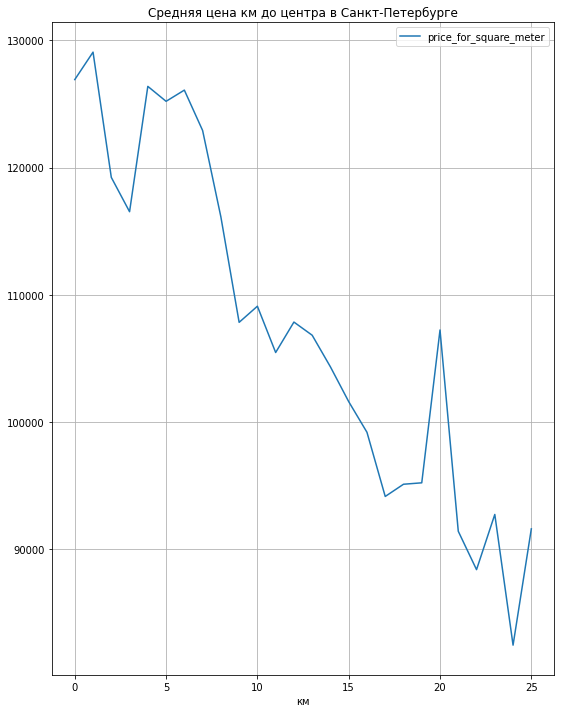

In [129]:
data.query("locality_name == 'Санкт-Петербург'") \
    .pivot_table(index="cityCenters_km", values="price_for_square_meter", aggfunc="mean") \
    .plot(grid=True, figsize=(9,12), title = 'Средняя цена км до центра в Санкт-Петербурге', xlabel='км');

**Вывод:** Чем дальше от центра, тем дешевле объект недвижимости.

### Общий вывод

На основе исходных данных был проведен последовательный исследовательский анализ в несколько этапов: был осуществлен обзор данных, их предварительная обработка (удаление или заполнение пропущенных значений, удаление дубликатов, изменение типов данных на корректные, устранение выбивающихся из общего ряда аномальных значений, расчитаны новые переменные для более детального анализа). 

В ходе исследовательского анализа были сначала описаны параметры с использованием гистограмм и математических показателей (среднее, медиана, процентили, минимальное и максимальное значение), а затем изучены факторы, от которых зависит полная стоимость объекта с помощью построения диаграмм рассеивания и расчета коэффициента корреляции Пирсона.

На основе предоставленного архива объявлений о продаже квартир в Санкт-Петербурге и ближайших населенных пунктов, были выявлены следующие ключевые взаимосвязи:

    а) на цену объекта сильней всего влияет общая площадь (коэффициент корреляции Пирсона равен 0.74), чуть менее - жилая площадь, площадь кухни вносит несущественный вклад;
    б) чем больше комнат в квартире, тем выше цена объекта;
    в) наиболее дешевыми являются объекты на первом этаже;
    г) удаленность от центра негативно влияет на стоимость недвижимости;
    д) для наиболее популярных населеннных пунктов средняя цена квадратного метра представлена следующей таблицей:
    
    Санкт-Петербург      108183
    Пушкин               101881
    деревня Кудрово       95369
    поселок Парголово     90291
    поселок Мурино        85529
    поселок Шушары        78662
    Колпино               75426
    Гатчина               68799
    Всеволожск            67114
    Выборг                58242

Исходя из полученных взаимосвязей, для создания алгоритма, выявляющий мошенническую деятельность, целесообразно учитывать в анализе следующие параметры недвижимости: ее общую площадь, жилую площадь, количество комнат, номер этажа, день недели и месяц публикации объявления о продаже, удаленность от центра, а также населенный пункт.